In [1]:
import numpy as np
import torch
from transformers import AutoModelForCausalLM

from gptomics import gptneo

# Automatically rounding outputs to 4 digits
np.set_printoptions(precision=4)

/home/nt/miniconda3/envs/gpt-neo/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = AutoModelForCausalLM.from_pretrained(
    "EleutherAI/gpt-neo-125M"
)

In [8]:
Of = model.transformer.h[0].attn.attention.q_proj.weight.data.numpy()

In [9]:
Of.shape

(768, 768)

In [11]:
np.linalg.matrix_rank(Of)

767

In [18]:
import matplotlib.pyplot as plt

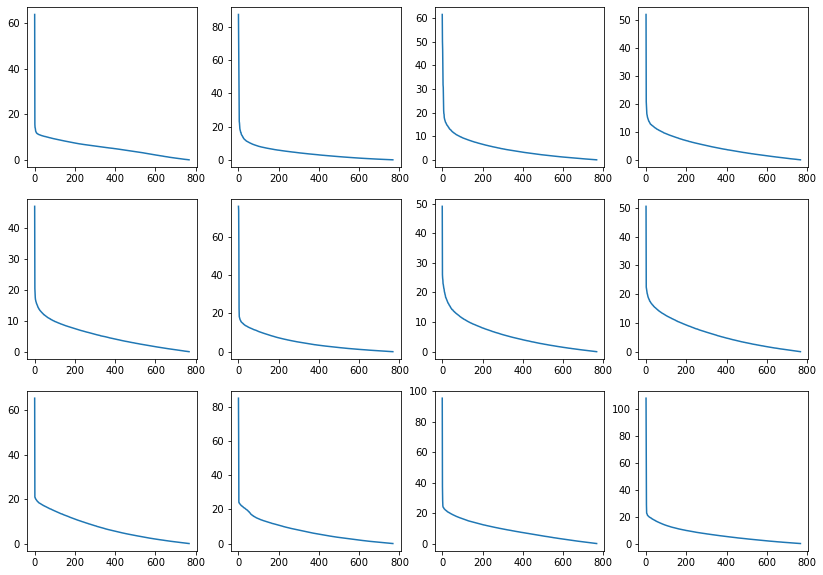

In [20]:
plt.figure(figsize=(14, 10))

for i in range(12):
    Of = model.transformer.h[i].attn.attention.out_proj.weight.data.numpy()
    
    plt.subplot(3, 4, i+1)
    _, S, _ = np.linalg.svd(Of)
    plt.plot(S)

plt.show()

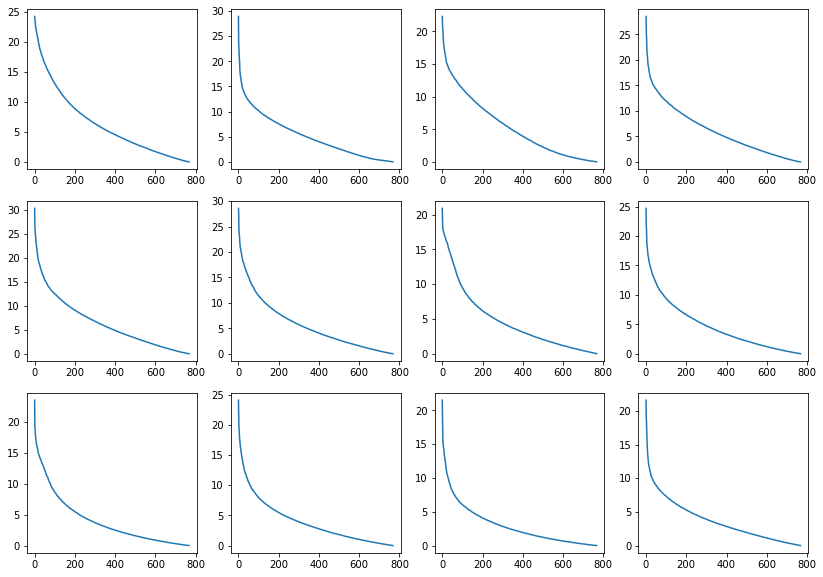

In [22]:
plt.figure(figsize=(14, 10))

for i in range(12):
    Q = model.transformer.h[i].attn.attention.q_proj.weight.data.numpy()
    
    plt.subplot(3, 4, i+1)
    _, S, _ = np.linalg.svd(Q)
    plt.plot(S)

plt.show()

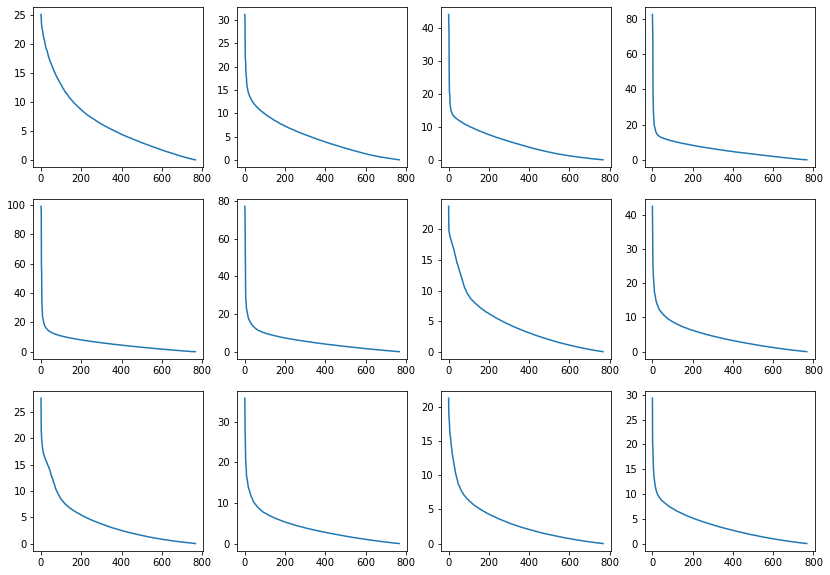

In [23]:
plt.figure(figsize=(14, 10))

for i in range(12):
    K = model.transformer.h[i].attn.attention.k_proj.weight.data.numpy()
    
    plt.subplot(3, 4, i+1)
    _, S, _ = np.linalg.svd(K)
    plt.plot(S)

plt.show()

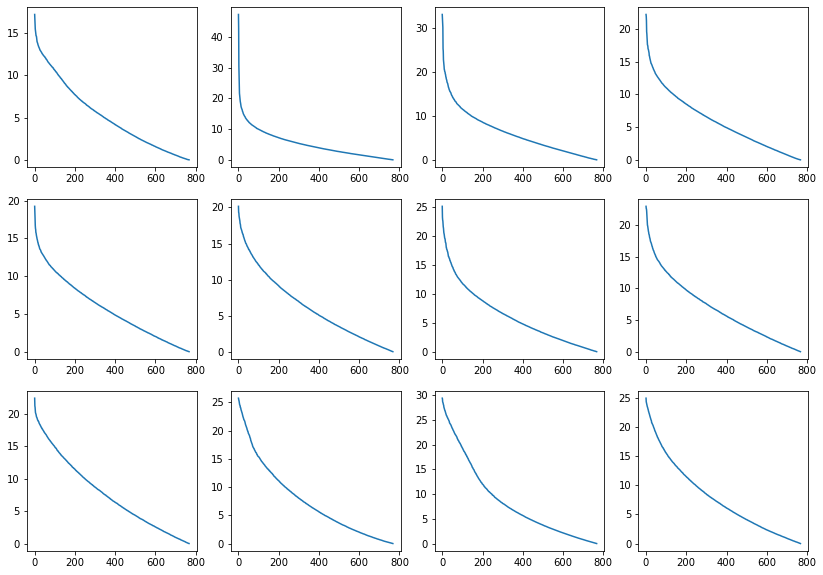

In [24]:
plt.figure(figsize=(14, 10))

for i in range(12):
    V = model.transformer.h[i].attn.attention.v_proj.weight.data.numpy()
    
    plt.subplot(3, 4, i+1)
    _, S, _ = np.linalg.svd(V)
    plt.plot(S)

plt.show()